# ***QUESTION 2***

---



---



### ***1. Make a Dataset of 1000 points sampled from a zero-centred gaussian distribution with a covariance matrix.***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
covar_mat = np.matrix('0.6006771 0.14889879 0.244939; 0.14889879 0.58982531 0.241548981; 0.244939 0.24154981 0.48778655')
mean = [0, 0, 0]

In [ ]:
data_2 = np.random.multivariate_normal(mean, covar_mat, size=1000)

<ipython-input-146-18f3411648fe>:1: RuntimeWarning:

covariance is not positive-semidefinite.



In [ ]:
labels = np.zeros(1000)
v = np.array([1, 1, -2]) / np.sqrt(6)

for i in range(1000):
    if np.dot(data_2[i], v) > 0:
        labels[i] = 0
    else:
        labels[i] = 1

In [ ]:
data_df_2 = pd.DataFrame(data_2)
data_df_2[3] = labels
data_df_2.columns = ['x', 'y', 'z', 'labels']

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_df_2, x='x', y='y', z='z',
              color='labels')
fig.show()

### ***2. Apply Principal Component analysis (using sklearn) with n_components=3 on the input data X and transform the data accordingly.***

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data2_pca = pca.fit_transform(data_2)

In [ ]:
data2_pca

array([[ 0.60598095,  0.54363415,  0.56567154],
       [ 1.20414897, -0.30886429, -0.23463857],
       [ 1.4683542 ,  0.37736601, -0.03958603],
       ...,
       [ 0.050974  , -0.77270167, -0.11589532],
       [-0.23941726,  0.2629038 , -0.0056305 ],
       [-0.31814648,  0.11602472, -1.07714659]])

In [ ]:
data2_df_pca = pd.DataFrame(data2_pca)
data2_df_pca[3] = labels
data2_df_pca.columns = ['x', 'y', 'z', 'labels']

### ***3. Perform Complete FS on the Transformed Data with a number of features in subset =2. Fit a Decision Tree for every subset-set of features of size 2 and plot their decision boundaries superimposed with the data.***

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
import sklearn.feature_selection

In [ ]:
features = np.array([['x', 'z'],
                     ['y', 'z'],
                     ['x', 'y']])



For feature axis  ['x' 'z'] , accuracy on train data is:  1.0 ...............and on test data is:  0.925 




For feature axis  ['y' 'z'] , accuracy on train data is:  1.0 ...............and on test data is:  0.96 




<ipython-input-155-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-155-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored





For feature axis  ['x' 'y'] , accuracy on train data is:  1.0 ...............and on test data is:  0.515 




<ipython-input-155-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



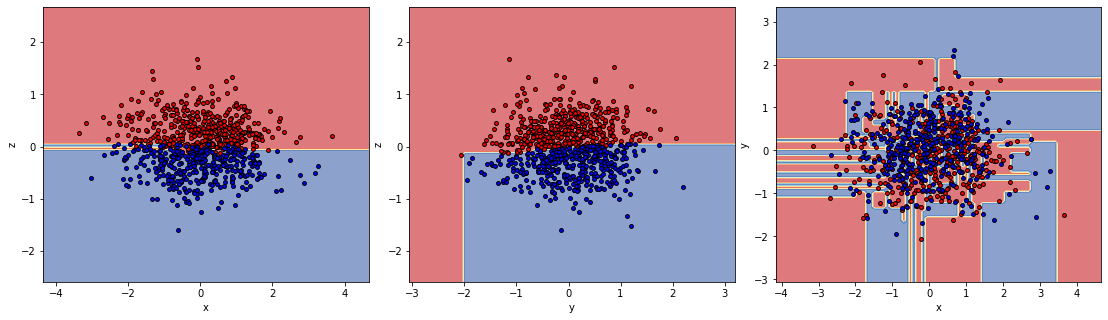

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split as split

plt.figure(figsize=(16, 5))

for i in range(3):

    feature = features[i]
    classes = [0, 1]

    x = pd.DataFrame.to_numpy(data2_df_pca[feature])

    x_train, x_test, y_train, y_test = split(x, labels, train_size = 0.8)

    dtc = DTC()
    dtc.fit(x_train, y_train)

    print("\n\nFor feature axis ", feature, ', accuracy on train data is: ', dtc.score(x_train, y_train), '...............and on test data is: ', dtc.score(x_test, y_test), '\n\n')

    # Parameters
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02

    ax = plt.subplot(1, 3, i+1)

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        dtc,
        x_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=feature[0],
        ylabel=feature[1],
        alpha = 0.6
        )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == classes[i])
        plt.scatter(
            x_train[idx, 0],
            x_train[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.show()

### ***4. Which of the above feature subsets represents the one that can be obtained by applying PCA(n_components =2)? Explain the difference in the accuracies between this subset and other subsets by running suitable experiments.***

In [ ]:
pca = PCA(n_components=2)
data2_pca_4 = pca.fit_transform(data_2)

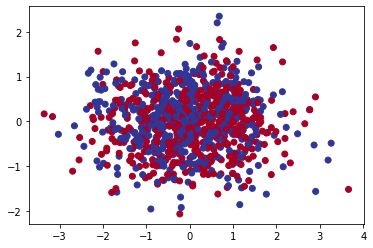

In [ ]:
plt.scatter(data2_pca_4[:, 0], data2_pca_4[:, 1], c=labels, cmap='RdYlBu')
plt.show()

**The data formed with n_components=2 can represent the subset which had 'x' and 'y' axis of the data as its features from the previous data with n_components=3.**

<ipython-input-158-e947507d9477>:31: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



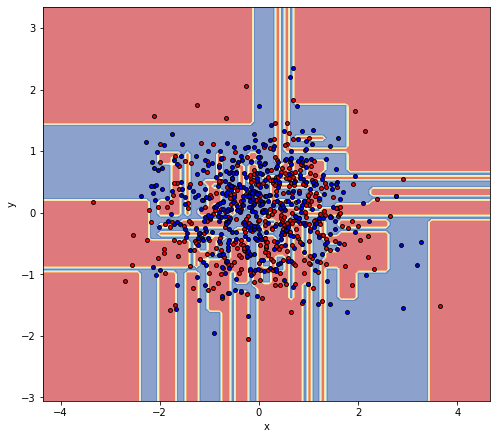

In [ ]:
x = data2_pca_4
x_train2, x_test2, y_train2, y_test2 = split(x, labels, train_size = 0.8)

dtc2 = DTC()
dtc2.fit(x_train2, y_train2)

plt.figure(figsize=(20, 12))

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    dtc2,
    x_train2,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='x',
    ylabel='y',
    alpha = 0.6
    )

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train2 == classes[i])
    plt.scatter(
        x_train2[idx, 0],
        x_train2[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.show()


In [ ]:
print('Accuracy on train data is: ', dtc2.score(x_train2, y_train2), '   and on test data is: ', dtc2.score(x_test2, y_test2))

Accuracy on train data is:  1.0    and on test data is:  0.465
